HELP: https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
sample = 0.01

# Fonctions

In [ ]:
# Affichage des infos du dataset
def infos(df: pd.DataFrame, head = False):
    memory_gb = np.round(df.memory_usage(deep=True).sum()/(1024**3),2)
    nb_lignes = df.shape[0]
    nb_columns = df.shape[1]
    print(f'A ce stade ce dataset contient {nb_lignes} lignes et {nb_columns} colonnes. (conso mémoire {memory_gb}Gb)')
    if head:
        return df.head()
    
# Graphe des taux de remplissage
def remplissage(df: pd.DataFrame, treshold = 101, ascending = False):
    df_na = pd.DataFrame(((1- df.isna().mean()) * 100).round(0)).rename(columns={0: 'mean'})
    df_na = df_na[df_na['mean'] < treshold]
    ax = sns.barplot(data=df_na, x='mean', y=df_na.index, palette='ocean', order=df_na.sort_values(by='mean', ascending=ascending).index)
    ax.bar_label(ax.containers[0], fmt='%.0f%%', padding=-35, c="white")
    plt.title(f'Taux de remplissage inférieur à {treshold} : {df_na.size} colonnes')

# Exploration

In [33]:
train = pd.read_csv('data/original/application_train.csv')

train = train.

bureau = pd.read_csv('data/original/bureau.csv')
bureau_balance = pd.read_csv('data/original/bureau_balance.csv')

previous = pd.read_csv('data/original/previous_application.csv')
pop_cash = pd.read_csv('data/original/POS_CASH_balance.csv')
instalements_payments = pd.read_csv('data/original/installments_payments.csv')
credit_card_balance = pd.read_csv('data/original/credit_card_balance.csv')

In [7]:
infos(train, True)

A ce stade ce dataset contient 307511 lignes et 122 colonnes. (conso mémoire 0.52Gb)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
infos(test, True)

A ce stade ce dataset contient 48744 lignes et 121 colonnes. (conso mémoire 0.08Gb)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Cible

In [12]:
train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Text(0.5, 1.0, 'Répartition de la target')

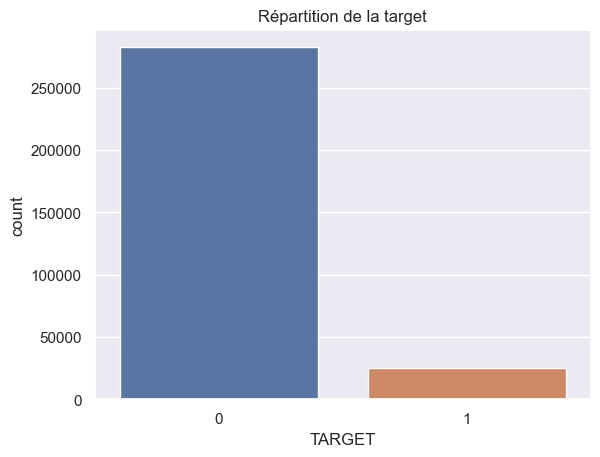

In [26]:
ax = sns.countplot(x=train['TARGET'])
ax.set_title('Répartition de la target')

1. <u>La cible est binaire:</u>

    0 = Le crédit a été remboursé<br>
    1 = Le crédit n'a pas été remboursé

    En conséquence il s'agit d'un problème de classification binaire.<br>
    Nous pouvons envisager 2 metriques pour choisir le meilleur algorithme:

    1. L'accuracy (taux de bonnes prédictions)
    2. L'AUROC (L'aire sous la courbe roc qui permet de maximiser les Vrais positifs et minimiser les faux positifs, et de choisir le seuil optimal)

2. <u>La cible est déséquilibrée</u>

    L'utilisation d'une métrique de type Accuracy est déconseillée (https://lrouviere.github.io/TUTO_ML/dondes.htmlhttps://lrouviere.github.io/TUTO_ML/dondes.html) car même un bon score ne permet de connaitre la répartition des vrais/faux positifs.<br>
    Exemple: Je pourrai obtenir 90% d'accuracy avec de mauvaises prédictions qui soient toutes des faux positifs (auquel cas je vais accorder 10% de mes crédits à de mauvais clients).<br>
    
### Conclusion    

    1. La métrique choisie est donc l'AUROC.
    2. On donnera un poids aux classes si possible lors de l'apprentissage (scale_pos_weight par exemple dans les params XGBoost)

## Valeurs manquantes

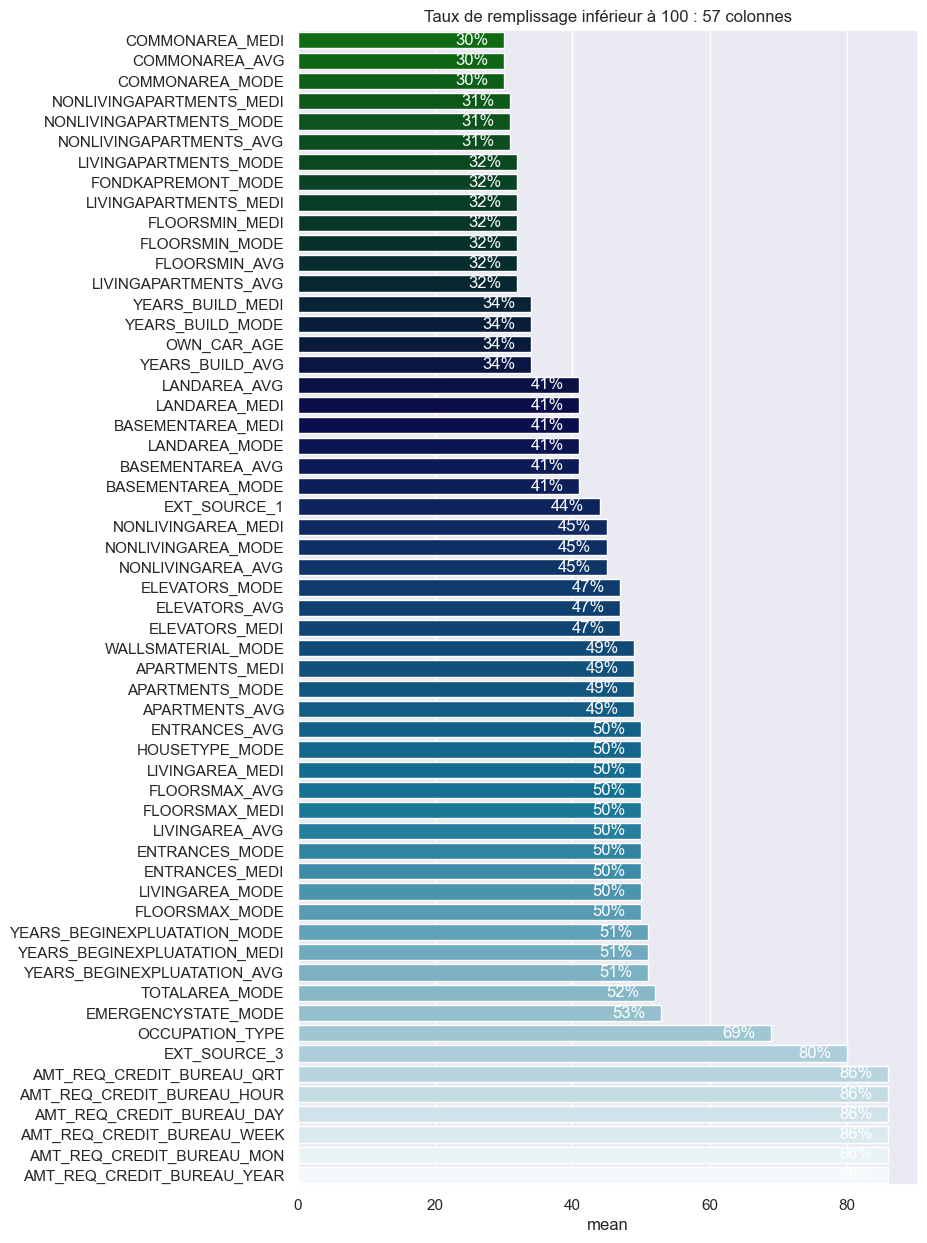

In [73]:
plt.figure(figsize=(8,15))
remplissage(train, 100, True)

On testera plusieurs solutions sur les modèles d'apprentissage

- Laisser le model gerer les valeurs manquantes si ce paramètrage est possible
- Imputer des colonnes (moyenne, mediane)
- Supprimer des colonnes trop vides

### Valeurs catégorielles

In [63]:
train.select_dtypes('object').nunique().sort_values()

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64